In [2]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import re

# Import helper functions
import helper_functions as fu

In [3]:
votes_meps_EP9_or = fu.read_xlsx('data/base_data/EP9_RCVs_2022_06_22.xlsx')
voted_docs_EP9_or = fu.read_xlsx('data/base_data/EP9_Voted_docs.xlsx')
votes_meps_EP8_or = fu.read_xlsx('data/base_data/EP8_RCVs_2019_06_25_all_MEPs.xlsx')
voted_docs_EP8_or = fu.read_xlsx('data/base_data/EP8_Voted_docs.xlsx')
votes_meps_EP7_or = fu.read_xlsx('data/base_data/EP7_RCVs_2014_06_19.xlsx')
voted_docs_EP7_or = fu.read_xlsx('data/base_data/EP7_Voted_docs.xlsx')

In [4]:
print(votes_meps_EP9_or.shape)
print(votes_meps_EP8_or.shape)
print(votes_meps_EP7_or.shape)
display(votes_meps_EP8_or.head())
display(voted_docs_EP8_or.head())

(811, 13469)
(866, 10261)
(853, 6970)


,WebisteEpID,Fname,Lname,Activ,Country,Party,EPG,Start,End,1,...,10267,10268,10269,10270,10271,10272,10273,10274,10275,10276
0,124990.0,Lars,ADAKTUSSON,no,Sweden,Kristdemokraterna,EPP,2014-07-01,2018-09-23,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,124831.0,Isabella,ADINOLFI,yes,Italy,Movimento 5 Stelle,Europe of Freedom and Direct Democracy Group,2014-07-01,2019-12-31,5.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,124797.0,Marco,AFFRONTE,yes,Italy,Independent,Group of the Greens/European Free Alliance,2014-07-01,2019-12-31,2.0,...,3.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,124811.0,Laura,AGEA,yes,Italy,Movimento 5 Stelle,Europe of Freedom and Direct Democracy Group,2014-07-01,2019-12-31,5.0,...,1.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0
4,96897.0,John Stuart,AGNEW,yes,United Kingdom,United Kingdom Independence Party,Europe of Freedom and Direct Democracy Group,2014-07-01,2019-12-31,2.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


,Vote ID,File,Order of vote,Date,O'clock,Title,Title_Ro,Title_Fr,Title_German,Title_Polski,...,Subject_ger,Subject_pl,Final \nvote?,Am No.,Author,RCV,Vote,Yeas,No,Abs
0,1,1.0,1.0,2014-07-16 00:00:00,NaN,Appointment of 4 members of the European Commi...,Numirea a patru membri ai Comisiei Europene - ...,Nomination de 4 membres de la Commission europ...,Ernennung von vier Mitgliedern der Kommission ...,Powołanie 4 członków Komisji Europejskiej - Jy...,...,NaN,NaN,1.0,NaN,0,RCV,+,421,170,32
1,2,1.0,1.0,2014-07-16 00:00:00,NaN,Adoption by Lithuania of the euro on 1 January...,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,4,GUE/NGL,RCV,-,148,514,10
2,3,1.0,2.0,2014-07-16 00:00:00,NaN,Adoption by Lithuania of the euro on 1 January...,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1,Greens/ EFA,RCV,-,137,525,19
3,4,1.0,3.0,2014-07-16 00:00:00,NaN,Adoption by Lithuania of the euro on 1 January...,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,3,Greens/ EFA,RCV,-,93,550,40
4,5,1.0,4.0,2014-07-16 00:00:00,NaN,Adoption by Lithuania of the euro on 1 January...,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,0,RCV,+,545,116,34


In [5]:
# total number of votes 2014 to 2022
total_votes_14to22 = voted_docs_EP9_or.shape[0] + voted_docs_EP8_or.shape[0] + voted_docs_EP7_or.shape[0]

print(f"There have been {total_votes_14to22} RCV votes in the European Parliament from 2009 to 2022.")

There have been 30672 RCV votes in the European Parliament from 2009 to 2022.


In [6]:
# Only choose legislative procedure with Parliament as co-legislator
voted_docs_EP9 = voted_docs_EP9_or[voted_docs_EP9_or['Leg/Non-Leg/Bud'] == 'Leg']
voted_docs_EP9 = voted_docs_EP9[voted_docs_EP9['Procedure'] != '*']
voted_docs_EP9 = voted_docs_EP9[voted_docs_EP9['Procedure'] != '* ']

voted_docs_EP8 = voted_docs_EP8_or[voted_docs_EP8_or['Leg/Non-Leg/Bud'] == 'Leg']
voted_docs_EP8 = voted_docs_EP8[voted_docs_EP8['Procedure'] != '*']
voted_docs_EP8 = voted_docs_EP8[voted_docs_EP8['Procedure'] != '* ']

voted_docs_EP7 = voted_docs_EP7_or[voted_docs_EP7_or['Leg/Non-Leg/Bud'] == 'Leg']
voted_docs_EP7 = voted_docs_EP7[voted_docs_EP7['Procedure'] != '*']
voted_docs_EP7 = voted_docs_EP7[voted_docs_EP7['Procedure'] != '* ']

total_votes_leg = voted_docs_EP9.shape[0] + voted_docs_EP8.shape[0] + voted_docs_EP7.shape[0]
print(f"The European Parliament voted as co-legislator on {total_votes_leg} legal procedures, excluding votes on budget.")

# Count votes on budget
total_votes_bud = voted_docs_EP9_or[
    voted_docs_EP9_or['Leg/Non-Leg/Bud'] == 'Bud'].shape[0] + voted_docs_EP8_or[
        voted_docs_EP8_or['Leg/Non-Leg/Bud'] == 'Bud'].shape[0] + voted_docs_EP7_or[
            voted_docs_EP7_or['Leg/Non-Leg/Bud'] == 'Bud'].shape[0]
print(f"The European Parliament voted as co-legislator on {total_votes_bud} budget procedures.")

The European Parliament voted as co-legislator on 6418 legal procedures, excluding votes on budget.
The European Parliament voted as co-legislator on 2392 budget procedures.


(2582, 24)
(257, 24)
(2107, 33)
(508, 33)
(1729, 28)
(628, 28)


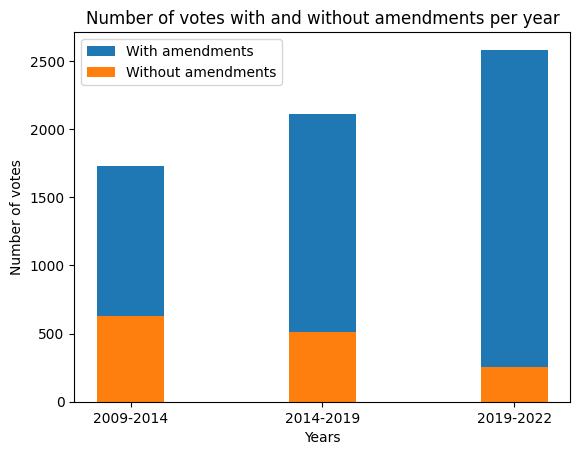

Between 2009 and 2022, the European Parliament adopted or rejected 1393 proposed laws.


In [7]:
# Delete votes on amendments

# copy voted_docs_consensus to voted_docs_consensus_laws
print(voted_docs_EP9.shape)
# only keep rows where final vote is 1
voted_laws_EP9 = voted_docs_EP9[voted_docs_EP9['Final vote?'] == 1]
print(voted_laws_EP9.shape)

print(voted_docs_EP8.shape)
voted_laws_EP8 = voted_docs_EP8[voted_docs_EP8['Final \nvote?'] == 1]
print(voted_laws_EP8.shape)

print(voted_docs_EP7.shape)
voted_laws_EP7 = voted_docs_EP7[voted_docs_EP7['Final vote?'] == 1]
print(voted_laws_EP7.shape)

# Bar plot on number of votes per year with and without amendments
votes_with_amendments = [voted_docs_EP7.shape[0], voted_docs_EP8.shape[0], voted_docs_EP9.shape[0]]
votes_without_amendments = [voted_laws_EP7.shape[0], voted_laws_EP8.shape[0], voted_laws_EP9.shape[0]]
years = ['2009-2014', '2014-2019', '2019-2022']
fig, ax = plt.subplots()
bar_width = 0.35
bar1 = ax.bar(years, votes_with_amendments, bar_width, label='With amendments')
bar2 = ax.bar(years, votes_without_amendments, bar_width, label='Without amendments')
ax.set_xlabel('Years')
ax.set_ylabel('Number of votes')
ax.set_title('Number of votes with and without amendments per year')
ax.legend()
plt.show()

# Total number of votes on laws
total_votes_laws = voted_laws_EP9.shape[0] + voted_laws_EP8.shape[0] + voted_laws_EP7.shape[0]
print(f"Between 2009 and 2022, the European Parliament adopted or rejected {total_votes_laws} proposed laws.")

How many legislative procedures were rejected?

In [8]:
# How many final laws were rejected
rejected_laws_EP9 = voted_laws_EP9[voted_laws_EP9['Vote'] == '-']
rejected_laws_EP8 = voted_laws_EP8[voted_laws_EP8['Vote'] == '-']
rejected_laws_EP7 = voted_laws_EP7[voted_laws_EP7['Vote'] == '-']
rejected_laws = rejected_laws_EP9.shape[0] + rejected_laws_EP8.shape[0] + rejected_laws_EP7.shape[0]
print(f"Between 2009 and 2022, the European Parliament rejected {rejected_laws} proposed laws, this is {round((rejected_laws/total_votes_laws)*100, 2)}% of all proposed laws.")

Between 2009 and 2022, the European Parliament rejected 28 proposed laws, this is 2.01% of all proposed laws.


In [9]:
# percentage of votes rejected out of the 2582 legislative procedures
votes_rejected = voted_docs_EP9[voted_docs_EP9['Vote'] == '-'].shape[0]
votes_rejected_perc = votes_rejected/voted_docs_EP9.shape[0]
print(f"Between 2019-2022, {votes_rejected_perc:.2%} of all legislative procedures were rejected, including amendments.")

votes_rejected = voted_docs_EP8[voted_docs_EP8['Vote'] == '-'].shape[0]
votes_rejected_perc = votes_rejected/voted_docs_EP8.shape[0]
print(f"Between 2014-2019, {votes_rejected_perc:.2%} of all legislative procedures were rejected, including amendments.")

votes_rejected = voted_docs_EP7[voted_docs_EP7['Vote'] == '-'].shape[0]
votes_rejected_perc = votes_rejected/voted_docs_EP7.shape[0]
print(f"Between 2009-2014, {votes_rejected_perc:.2%} of all legislative procedures were rejected, includin amendments.")

Between 2019-2022, 38.26% of all legislative procedures were rejected, including amendments.
Between 2014-2019, 39.11% of all legislative procedures were rejected, including amendments.
Between 2009-2014, 27.07% of all legislative procedures were rejected, includin amendments.


In [10]:
# How many of amendments were rejected

# get only amendments as voted docs minus voted laws
voted_amendments_EP9 = voted_docs_EP9[voted_docs_EP9['Final vote?'] != 1]
voted_amendments_EP8 = voted_docs_EP8[voted_docs_EP8['Final \nvote?'] != 1]
voted_amendments_EP7 = voted_docs_EP7[voted_docs_EP7['Final vote?'] != 1]

# Total number of amendments voted on
total_votes_amendments = voted_amendments_EP9.shape[0] + voted_amendments_EP8.shape[0] + voted_amendments_EP7.shape[0]
print(f"Between 2009 and 2022, the European Parliament voted on {total_votes_amendments} proposed amendments.")

# How many amendments were rejected
rejected_amendments_EP9 = voted_amendments_EP9[voted_amendments_EP9['Vote'] == '-']
rejected_amendments_EP8 = voted_amendments_EP8[voted_amendments_EP8['Vote'] == '-']
rejected_amendments_EP7 = voted_amendments_EP7[voted_amendments_EP7['Vote'] == '-']
rejected_amendments = rejected_amendments_EP9.shape[0] + rejected_amendments_EP8.shape[0] + rejected_amendments_EP7.shape[0]
print(f"Between 2009 and 2022, the European Parliament rejected {rejected_amendments} proposed amendments, this is {round((rejected_amendments/total_votes_amendments)*100, 2)}% of all proposed amendments.")

# How many rejected amendments were authored by a single party group
# check if Author is one of the following: ID, ECR, Greens/ EFA, Greens, GUE/NGL, NI, EPP, The Left, S&D, ALDE
rejected_amendments_EP9_not_com = rejected_amendments_EP9[~rejected_amendments_EP9['Author'].isin(['ID', 'ECR', 'Greens/EFA', 'Greens/ EFA', 'Renew', 'NI', 'EPP', 'S&D', 'The Left'])]
rejected_amendments_EP8_not_com = rejected_amendments_EP8[~rejected_amendments_EP8['Author'].isin(['ID', 'ECR', 'Greens/EFA', 'Greens/ EFA', 'Renew', 'NI', 'EPP', 'S&D', 'The Left'])]
rejected_amendments_EP7_not_com = rejected_amendments_EP7[~rejected_amendments_EP7['Author'].isin(['EFDD', 'ENF', 'ECR', 'Greens/EFA', 'Greens/ EFA', 'ALDE', 'NI', 'EPP', 'PPE', 'S&D', 'GUE/NGL'])]

rejected_amendments_not_com = rejected_amendments_EP9_not_com.shape[0] + rejected_amendments_EP8_not_com.shape[0] + rejected_amendments_EP7_not_com.shape[0]
print(f"Between 2009 and 2022, {rejected_amendments_not_com} rejected amendments were authored by a single party group, this is {round((rejected_amendments_not_com/rejected_amendments)*100, 2)}% of all rejected amendments.")

display(rejected_amendments_EP9_not_com.head())

Between 2009 and 2022, the European Parliament voted on 5025 proposed amendments.
Between 2009 and 2022, the European Parliament rejected 2252 proposed amendments, this is 44.82% of all proposed amendments.
Between 2009 and 2022, 1441 rejected amendments were authored by a single party group, this is 63.99% of all rejected amendments.


,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,Policy area,Subject,Final vote?,Am No.,Author,RCV,Vote,Yes,No,Abs
847,848,32,2,17.04.2020,Specific measures to provide exceptional flexi...,***I,Leg,Draft legislative resolution,s,Omarjee,...,Regional development,"Article 1, point 1\nRegulation (EU) No 1303/20...",0.0,1,EUL/NGL,RCV,-,38,613,40
848,849,32,3,17.04.2020,Specific measures to provide exceptional flexi...,***I,Leg,Draft legislative resolution,s,Omarjee,...,Regional development,"Article 2, after point 1\nRegulation (EU) No 1...",0.0,2,EUL/NGL,RCV,-,47,604,40
849,850,32,4,17.04.2020,Specific measures to provide exceptional flexi...,***I,Leg,Draft legislative resolution,s,Omarjee,...,Regional development,"Article 2, after point 1\nRegulation (EU) No 1...",0.0,3,EUL/NGL,RCV,-,47,601,43
852,853,32,2,17.04.2020,Introduction of specific measures for addressi...,***I,Leg,Draft legislative resolution,s,0,...,Employment & Social Affairs,"Article 1, before point 1\nRegulation (EU) No ...",0.0,3,EUL/NGL,RCV,-,20,660,10
854,855,32,4,17.04.2020,Introduction of specific measures for addressi...,***I,Leg,Draft legislative resolution,s,0,...,Employment & Social Affairs,"Article 1, after point 6\nRegulation (EU) No 2...",0.0,4,EUL/NGL,RCV,-,43,634,12


In [11]:
# Align dataframes
# Delete columns that are not needed
voted_laws_EP8 = voted_laws_EP8.drop(columns=['Subject_ro', 'Subject_ger', 'Subject_fr', 'Subject_pl', "O'clock", 'Title_Ro', 'Title_Fr', 'Title_German', 'Title_Polski'])
voted_laws_EP7 = voted_laws_EP7.drop(columns=["O'clock", "Unnamed: 25", "Unnamed: 26", "Unnamed: 27"])
# align column names interinstitutional file number
voted_laws_EP8 = voted_laws_EP8.rename(columns={"interinstitutional file number": "Interinstitutional file number"})
voted_laws_EP7 = voted_laws_EP7.rename(columns={"interinstitutional file number": "Interinstitutional file number"})

How many times did MEPs on average not attend a vote?

In [12]:
# mean of mean of 5s and 4s of each MEP on all 30672 RCV votes
# add column attendence with count of all 5s and 4s in each row
votes_meps_EP9_or['attendance'] = votes_meps_EP9_or.apply(
    # lambda function to count all 5s and 4s in each row
    lambda row: (row == 5).sum() + (row == 4).sum(),
    axis=1)/voted_docs_EP9_or.shape[0]
votes_meps_EP8_or['attendance'] = votes_meps_EP8_or.apply(
    # lambda function to count all 5s and 4s in each row
    lambda row: (row == 5).sum() + (row == 4).sum(),
    axis=1)/voted_docs_EP8_or.shape[0]
votes_meps_EP7_or['attendance'] = votes_meps_EP7_or.apply(
    # lambda function to count all 5s and 4s in each row
    lambda row: (row == 5).sum() + (row == 4).sum(),
    axis=1)/voted_docs_EP7_or.shape[0]

# average attendance
mean_att_EP9 = 1 - votes_meps_EP9_or['attendance'].mean()
print(f"Between 2019-2022, the average attendance of MEPs to all votes was {mean_att_EP9:.2%}")

mean_att_EP8 = 1 - votes_meps_EP8_or['attendance'].mean()
print(f"Between 2014-2019, the average attendance of MEPs to all votes was {mean_att_EP8:.2%}")

mean_att_EP7 = 1 - votes_meps_EP7_or['attendance'].mean()
print(f"Between 2009-2014, the average attendance of MEPs to all votes was {mean_att_EP7:.2%}")

Between 2019-2022, the average attendance of MEPs to all votes was 96.97%
Between 2014-2019, the average attendance of MEPs to all votes was 89.85%
Between 2009-2014, the average attendance of MEPs to all votes was 85.78%


How many laws were passed after the first reading?

In [13]:
# percentage of votes accepted or rejected after the each reading
# concatenate series of percentages for each procedure to a dataframe
readings_df = pd.concat([fu.count_procedure(voted_docs_EP9), 
                         fu.count_procedure(voted_docs_EP8), 
                         fu.count_procedure(voted_docs_EP7)], 
                         axis=1)
readings_df.columns = ['EP9', 'EP8', 'EP7']
readings_df.index = ['First reading', 'Second reading', 'Third reading', 'Other']
display(readings_df.astype(float).round(4))

Between 2019-2022, 92.53% of votes were accepted or rejected after the first reading.
Between 2019-2022, 4.73% of votes were accepted or rejected after the second reading.
Between 2019-2022, 0.00% of votes were accepted or rejected after the third reading.
Between 2019-2022, 2.71% of votes were on resolutions or motions of resolutions initiated by the parliament.
Between 2019-2022, 82.68% of votes were accepted or rejected after the first reading.
Between 2019-2022, 3.94% of votes were accepted or rejected after the second reading.
Between 2019-2022, 0.00% of votes were accepted or rejected after the third reading.
Between 2019-2022, 9.07% of votes were on resolutions or motions of resolutions initiated by the parliament.
Between 2019-2022, 89.36% of votes were accepted or rejected after the first reading.
Between 2019-2022, 3.59% of votes were accepted or rejected after the second reading.
Between 2019-2022, 0.40% of votes were accepted or rejected after the third reading.
Between 201

,EP9,EP8,EP7
First reading,0.9253,0.8268,0.8936
Second reading,0.0473,0.0394,0.0359
Third reading,0.0000,0.0000,0.0040
Other,0.0271,0.0907,0.0388


Establish Majority Labels

In [14]:
# Align format of columns in all dataframes
# create FullName column in votes_meps_EP8
votes_meps_EP8_or['FullName'] = votes_meps_EP8_or['Lname'] + ', ' + votes_meps_EP8_or['Fname']

# change full party group name to abbreviations and old party group names to new ones
votes_meps_EP9 = fu.party_abbr(votes_meps_EP9_or)
votes_meps_EP8 = fu.party_abbr(votes_meps_EP8_or)
votes_meps_EP7 = fu.party_abbr(votes_meps_EP7_or)

In [15]:
# # Merge all votes_meps dataframes to one
# all_votes_meps = pd.concat([votes_meps_EP9_or, votes_meps_EP8_or, votes_meps_EP7_or], ignore_index=True)
# display(all_votes_meps.head())

# # save to csv
# all_votes_meps.to_csv('data/base_data/all_votes_meps.csv', index=False)

In [16]:
# format individual dataframes
# drop columns that are not needed
votes_meps_EP9 = votes_meps_EP9_or.drop(columns=[
    'Fname', 'Lname', 'WebisteEpID', "Start", "End", "Activ", "Country", "Party", "attendance"
    ])
votes_meps_EP8 = votes_meps_EP8_or.drop(columns=[
    'Fname', 'Lname', 'WebisteEpID', "Start", "End", "Activ", "Country", "Party", "attendance"
    ])
votes_meps_EP7 = votes_meps_EP7_or.drop(columns=[
    'Fname', 'Lname', "Start", "End", 'MEP ID', "Country", "Party", "attendance"
    ])

display(votes_meps_EP9.head())
display(votes_meps_EP8.head())
display(votes_meps_EP7.head())

# print unique values in column 'EPG'
print(votes_meps_EP9['EPG'].unique())
print(votes_meps_EP8['EPG'].unique())
print(votes_meps_EP7['EPG'].unique())

,FullName,EPG,1,2,3,4,5,6,7,8,...,13450,13451,13452,13453,13454,13455,13456,13457,13458,13459
0,"ADAMOWICZ, Magdalena",EPP,5,2,1,2,2,1,1,1,...,2,2,2,1,1,2,1,2,1,1
1,"ADEMOV, Asim",EPP,5,2,1,1,1,1,1,1,...,2,2,2,1,2,2,1,2,1,1
2,"ADINOLFI, Isabella",EPP,3,3,3,3,3,1,2,1,...,2,2,2,1,2,2,1,2,1,1
3,"ADINOLFI, Matteo",EFD/IDG,2,2,2,2,2,2,2,1,...,2,2,1,2,2,1,1,3,2,1
4,"AGIUS SALIBA, Alex",S&D,4,1,1,1,1,2,2,1,...,3,3,1,2,2,2,3,3,2,1


,EPG,1,2,3,4,5,6,7,8,9,...,10268,10269,10270,10271,10272,10273,10274,10275,10276,FullName
0,EPP,5.0,2.0,2.0,2.0,1.0,4.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"ADAKTUSSON, Lars"
1,EFD/IDG,5.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,"ADINOLFI, Isabella"
2,Greens/EFA,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,"AFFRONTE, Marco"
3,EFD/IDG,5.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,"AGEA, Laura"
4,EFD/IDG,2.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,"AGNEW, John Stuart"


,FullName,EPG,1,2,3,4,5,6,7,8,...,6954,6955,6956,6957,6958,6959,6960,6961,6962,6963
0,"ABAD, Damien",EPP,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,"ÁDER, János",EPP,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,"AGNEW, John Stuart",EFD/IDG,5,2,2,2,2,3,2,3,...,3,2,1,3,2,1,3,3,1,5
3,"ALBERTINI, Gabriele",EPP,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,"ALBRECHT, Jan Philipp",Greens/EFA,5,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4


['EPP' 'EFD/IDG' 'S&D' 'ECR' 'Greens/EFA' 'REG' nan 'The Left' 'NI']
['EPP' 'EFD/IDG' 'Greens/EFA' 'S&D' 'The Left' 'REG' 'NI' 'ECR' nan]
['EPP' 'EFD/IDG' 'Greens/EFA' 'REG' 'S&D' 'ECR' 'NI' 'The Left']


In [17]:
# check for NaNs in EPG column
print(f"Number of NaNs EP9: {votes_meps_EP9.isnull().sum().sum()}")
print(f"Number of NANs in EPG EP9: {votes_meps_EP9['EPG'].isnull().sum()}")
print(f"Number of NaNs EP8: {votes_meps_EP8.isnull().sum().sum()}")
print(f"Number of NANs in EPG EP8: {votes_meps_EP8['EPG'].isnull().sum()}")
print(f"Number of NaNs EP7: {votes_meps_EP7.isnull().sum().sum()}")
print(f"Number of NANs in EPG EP7: {votes_meps_EP7['EPG'].isnull().sum()}")

# print rows with NaN in EPG column
display(votes_meps_EP9[votes_meps_EP9['EPG'].isnull()])

# print unique values of row 657
print(votes_meps_EP9.iloc[366].unique())
print(votes_meps_EP9.iloc[657].unique())
# delete null rows
votes_meps_EP9 = votes_meps_EP9.drop(366)
votes_meps_EP9 = votes_meps_EP9.drop(657)
# manually add EPG to 16 and 118
votes_meps_EP9.loc[16, 'EPG'] = 'The Left'
votes_meps_EP9.loc[118, 'EPG'] = 'The Left'

# 107 MEPs in the EP8 have been inactive during some period
# There are 858 MEPs in the dataset, only 751 that have been active during the whole period are kept
print(votes_meps_EP8.shape)
votes_meps_EP8 = votes_meps_EP8.dropna(subset=['EPG'])
print(votes_meps_EP8.shape)

Number of NaNs EP9: 4
Number of NANs in EPG EP9: 4
Number of NaNs EP8: 82029
Number of NANs in EPG EP8: 8
Number of NaNs EP7: 0
Number of NANs in EPG EP7: 0


,FullName,EPG,1,2,3,4,5,6,7,8,...,13450,13451,13452,13453,13454,13455,13456,13457,13458,13459
16,"ANDERSON, Martina",NaN,4,1,1,1,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
118,"CARTHY, Matt",NaN,1,1,1,1,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
366,"KOFOD, Jeppe",NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
657,"TIMMERMANS, Frans",NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


['KOFOD, Jeppe' nan 0]
['TIMMERMANS, Frans' nan 0]
(866, 10254)
(858, 10254)


In [18]:
# unpivot dataframes from wide to long format
meps_melted_EP9 = votes_meps_EP9.melt(id_vars=['FullName', 'EPG'], var_name='Title', value_name='Vote')
meps_melted_EP8 = votes_meps_EP8.melt(id_vars=['FullName', 'EPG'], var_name='Title', value_name='Vote')
meps_melted_EP7 = votes_meps_EP7.melt(id_vars=['FullName', 'EPG'], var_name='Title', value_name='Vote')

# drop rows with NaN values in column "Vote"
meps_melted_EP9 = meps_melted_EP9.dropna(subset=['Vote'])
meps_melted_EP8 = meps_melted_EP8.dropna(subset=['Vote'])
meps_melted_EP7 = meps_melted_EP7.dropna(subset=['Vote'])

# convert all values in column Title to integers
meps_melted_EP9['Title'] = meps_melted_EP9['Title'].astype(int)
meps_melted_EP8['Title'] = meps_melted_EP8['Title'].astype(int)
meps_melted_EP7['Title'] = meps_melted_EP7['Title'].astype(int)

print(meps_melted_EP9.shape)
print(meps_melted_EP8.shape)
print(meps_melted_EP7.shape)
display(meps_melted_EP8.head())
test_law = (meps_melted_EP8[meps_melted_EP8['Title']==1507])


(10888331, 4)
(8796216, 4)
(5937733, 4)


,FullName,EPG,Title,Vote
0,"ADAKTUSSON, Lars",EPP,1,5.0
1,"ADINOLFI, Isabella",EFD/IDG,1,5.0
2,"AFFRONTE, Marco",Greens/EFA,1,2.0
3,"AGEA, Laura",EFD/IDG,1,5.0
4,"AGNEW, John Stuart",EFD/IDG,1,2.0


In [19]:
# count number of 1s in Vote
print(test_law[test_law['Vote']==1].shape[0])

173


Legend of votes
- 0 not an MEP [at the time of the vote]
- 1 for
- 2 against
- 3 abstention
- 4 absent
- 5 did not vote
- 6 motivated [only for EP6: MEP was absent, but this was explained by a certificate]

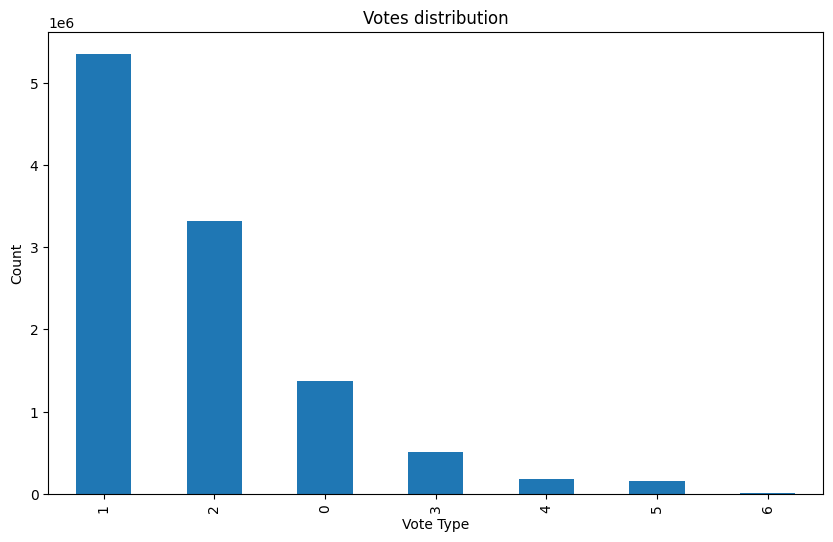

(8796216, 4)


In [20]:
# display a line plot of the different types of votes
plt.figure(figsize=(10, 6))
meps_melted_EP9['Vote'].value_counts().plot(kind='bar')
plt.title('Votes distribution')
plt.xlabel('Vote Type')
plt.ylabel('Count')
plt.show()

# delete rows with zero votes
meps_melted_EP9 = meps_melted_EP9[meps_melted_EP9['Vote'] != 0]
print(meps_melted_EP8.shape)

In [21]:
# set all votes > 1 to 0, 1 for in favour, 0 for all other votes
meps_melted_EP9['Vote'] = meps_melted_EP9['Vote'].apply(lambda x: 0 if x > 1 else x)
meps_melted_EP8['Vote'] = meps_melted_EP8['Vote'].apply(lambda x: 0 if x > 1 else x)
meps_melted_EP7['Vote'] = meps_melted_EP7['Vote'].apply(lambda x: 0 if x > 1 else x)

# group df_mps_melted by EPG and Title and calculate the sum of votes that are 1
meps_grouped_EP9 = meps_melted_EP9.groupby(['EPG', 'Title']).agg({'Vote': 'sum'}).reset_index() # in agg-function, function to use on column has to ba a string, see "sum"
meps_grouped_EP8 = meps_melted_EP8.groupby(['EPG', 'Title']).agg({'Vote': 'sum'}).reset_index()
meps_grouped_EP7 = meps_melted_EP7.groupby(['EPG', 'Title']).agg({'Vote': 'sum'}).reset_index()

# sort the df_mps_grouped by EPG and Title
meps_grouped_EP9 = meps_grouped_EP9.sort_values(by=['Title', "EPG"])
meps_grouped_EP8 = meps_grouped_EP8.sort_values(by=['Title', "EPG"])
meps_grouped_EP7 = meps_grouped_EP7.sort_values(by=['Title', "EPG"])

print(meps_grouped_EP8[meps_grouped_EP8["Title"]==1507])

# print number of NANs in Vote
print(f"Number of NaNs EP9: {meps_grouped_EP9['Vote'].isnull().sum()}")
print(f"Number of NaNs EP8: {meps_grouped_EP8['Vote'].isnull().sum()}")
print(f"Number of NaNs EP7: {meps_grouped_EP7['Vote'].isnull().sum()}")

              EPG  Title   Vote
1506          ECR   1507    1.0
11758     EFD/IDG   1507    0.0
22010         EPP   1507    4.0
32262  Greens/EFA   1507   39.0
42514          NI   1507    1.0
52766         REG   1507    0.0
63018         S&D   1507  128.0
73270    The Left   1507    0.0
Number of NaNs EP9: 0
Number of NaNs EP8: 0
Number of NaNs EP7: 0


In [22]:
# create a list of the number of members per group at Constitutive Session
members_EP9 = [62, 182, 73, 74, 57, 108, 154, 41, 751] # total of 751 members, pre-Brexit, before EP was reduced to 705 members
members_EP8 = [70, 221, 48, 50, 52, 67, 191, 52, 751] # total of 751 members
members_EP7 = [57, 273, 31, 57, 33, 83, 195, 35, 736] # total of 736 members, pre joining of Croatia

# dataframe with group name and number of members
group_members = pd.DataFrame({'group': ['ECR', 'EPP', 'EFD/IDG', 'Greens/EFA', "NI", 'REG', 'S&D', 'The Left', "total"],
                              'EP9': members_EP9,
                              'EP8': members_EP8,
                              'EP7': members_EP7}
                              )
# set groups as index
group_members.set_index('group', inplace=True)
group_members

,EP9,EP8,EP7
group,,,
ECR,62,70,57
EPP,182,221,273
EFD/IDG,73,48,31
Greens/EFA,74,50,57
NI,57,52,33
REG,108,67,83
S&D,154,191,195
The Left,41,52,35
total,751,751,736


In [23]:
# Calculate the percentage of votes in favour for each group
meps_grouped_EP9 = fu.calculate_percentage_votes(meps_grouped_EP9, group_members, "EP9")
meps_grouped_EP8 = fu.calculate_percentage_votes(meps_grouped_EP8, group_members, "EP8")
meps_grouped_EP7 = fu.calculate_percentage_votes(meps_grouped_EP7, group_members, "EP7")

display(meps_grouped_EP8[meps_grouped_EP8["Title"]==1507])

,EPG,Title,Vote,members,Sum_in_favour,Perc_in_favour
1506,ECR,1507,1.0,70,1,0.014
11758,EFD/IDG,1507,0.0,48,0,0.000
22010,EPP,1507,4.0,221,4,0.018
32262,Greens/EFA,1507,39.0,50,39,0.780
42514,NI,1507,1.0,52,1,0.019
52766,REG,1507,0.0,67,0,0.000
63018,S&D,1507,128.0,191,128,0.670
73270,The Left,1507,0.0,52,0,0.000


In [24]:
# pivot table back to wide format, set EPG and Title as columns, keep index
perc_in_favour_EP9 = meps_grouped_EP9.pivot(index='Title', columns='EPG', values=["Sum_in_favour", 'Perc_in_favour'])
perc_in_favour_EP8 = meps_grouped_EP8.pivot(index='Title', columns='EPG', values=["Sum_in_favour", 'Perc_in_favour'])
perc_in_favour_EP7 = meps_grouped_EP7.pivot(index='Title', columns='EPG', values=["Sum_in_favour", 'Perc_in_favour'])

# rename columns
column_names = ["ECR", "EFD/IDG", "EPP", "Greens/EFA", "NI", "REG", "S&D", "The Left",
                                "ECR%", "EFD/IDG%", "EPP%", "Greens/EFA%", "NI%", "REG%", "S&D%", "The Left%"
                                ]
perc_in_favour_EP9.columns = column_names
perc_in_favour_EP8.columns = column_names
perc_in_favour_EP7.columns = column_names

display(perc_in_favour_EP8[40:60])

,ECR,EFD/IDG,EPP,Greens/EFA,NI,REG,S&D,The Left,ECR%,EFD/IDG%,EPP%,Greens/EFA%,NI%,REG%,S&D%,The Left%
Title,,,,,,,,,,,,,,,,
41,39.0,15.0,207.0,37.0,4.0,61.0,175.0,1.0,0.557,0.312,0.937,0.74,0.077,0.910,0.916,0.019
42,10.0,5.0,205.0,40.0,9.0,58.0,179.0,44.0,0.143,0.104,0.928,0.80,0.173,0.866,0.937,0.846
43,26.0,45.0,210.0,41.0,16.0,60.0,180.0,46.0,0.371,0.938,0.950,0.82,0.308,0.896,0.942,0.885
44,27.0,40.0,210.0,42.0,12.0,58.0,178.0,47.0,0.386,0.833,0.950,0.84,0.231,0.866,0.932,0.904
45,9.0,45.0,208.0,42.0,12.0,56.0,179.0,46.0,0.129,0.938,0.941,0.84,0.231,0.836,0.937,0.885
46,9.0,48.0,207.0,40.0,10.0,60.0,181.0,47.0,0.129,1.000,0.937,0.80,0.192,0.896,0.948,0.904
47,26.0,45.0,209.0,42.0,13.0,57.0,180.0,46.0,0.371,0.938,0.946,0.84,0.250,0.851,0.942,0.885
48,12.0,45.0,185.0,3.0,13.0,57.0,166.0,0.0,0.171,0.938,0.837,0.06,0.250,0.851,0.869,0.000
49,12.0,30.0,180.0,2.0,11.0,58.0,163.0,7.0,0.171,0.625,0.814,0.04,0.212,0.866,0.853,0.135


In [25]:
# print voted_laws where Vote_ID is 41
print(voted_laws_EP8[voted_laws_EP8['Vote ID'] == 41])

    Vote ID  File  Order of vote                 Date  \
40       41   3.0            1.0  2014-09-16 00:00:00   

                                                Title Procedure  \
40  EU-Ukraine association agreement, as regards t...       ***   

   Leg/Non-Leg/Bud                  Type of Vote Voting Rule Rapporteur  ...  \
40             Leg  Draft legislative resolution           s    Moraes   ...   

                             De/Policy area      Subject Final \nvote? Am No.  \
40  Civil liberties, justice & home affairs  approbation           1.0    NaN   

   Author  RCV  Vote Yeas   No Abs  
40      0  RCV     +  539  123  33  

[1 rows x 24 columns]


In [26]:
# merge perc_in_favour with voted_docs, merge index with Vote ID
voted_laws_groups_EP9 = voted_laws_EP9.merge(perc_in_favour_EP9, left_on='Vote ID', right_index=True)
voted_laws_groups_EP8 = voted_laws_EP8.merge(perc_in_favour_EP8, left_on='Vote ID', right_index=True)
voted_laws_groups_EP7 = voted_laws_EP7.merge(perc_in_favour_EP7, left_on='Vote ID', right_index=True)

display(voted_laws_EP8.shape)
print(perc_in_favour_EP9.shape)
print(voted_laws_groups_EP9.shape)
display(voted_laws_groups_EP9.head())

print(voted_laws_EP8.shape)
print(perc_in_favour_EP8.shape)
print(voted_laws_groups_EP8.shape)  

print(voted_laws_EP7.shape)
print(perc_in_favour_EP7.shape)
print(voted_laws_groups_EP7.shape)

(508, 24)

(13459, 16)
(257, 40)


,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,S&D,The Left,ECR%,EFD/IDG%,EPP%,Greens/EFA%,NI%,REG%,S&D%,The Left%
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,119.0,29.0,0.581,0.466,0.764,0.784,0.421,0.713,0.773,0.707
83,84,10,1,22.10.2019,Fishing authorisations for Union fishing vesse...,***I,Leg,Draft legislative resolution,s,Davies,...,124.0,30.0,0.774,0.712,0.791,0.824,0.526,0.787,0.805,0.732
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,126.0,32.0,0.710,0.205,0.808,0.865,0.439,0.833,0.818,0.780
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,131.0,31.0,0.806,0.685,0.808,0.892,0.895,0.852,0.851,0.756
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,118.0,35.0,0.726,0.000,0.813,0.851,0.316,0.778,0.766,0.854


(508, 24)
(10252, 16)
(508, 40)
(628, 24)
(6961, 16)
(628, 40)


In [27]:
tested_thresholds_EP9 = fu.test_thresholds(voted_laws_groups_EP9, [0.66, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99, 1.0])
display(tested_thresholds_EP9)

tested_thresholds_EP8 = fu.test_thresholds(voted_laws_groups_EP8, [0.66, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99, 1.0])
display(tested_thresholds_EP8)

tested_thresholds_EP7 = fu.test_thresholds(voted_laws_groups_EP7, [0.66, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99, 1.0])
display(tested_thresholds_EP7)


,General Majority,GM%,Right Majority,RM%,Left Majority,LM%
Threshold,,,,,,
0.66,235,0.91,8,0.03,16,0.06
0.70,233,0.91,8,0.03,17,0.07
0.75,218,0.85,9,0.04,14,0.05
0.80,196,0.76,10,0.04,12,0.05
0.85,170,0.66,1,0.0,13,0.05
0.90,131,0.51,0,0.0,11,0.04
0.95,0,0.0,0,0.0,0,0.0
0.97,0,0.0,0,0.0,0,0.0
0.99,0,0.0,0,0.0,0,0.0


,General Majority,GM%,Right Majority,RM%,Left Majority,LM%
Threshold,,,,,,
0.66,444,0.87,12,0.02,53,0.1
0.70,434,0.85,11,0.02,43,0.08
0.75,412,0.81,9,0.02,39,0.08
0.80,345,0.68,8,0.02,25,0.05
0.85,259,0.51,9,0.02,17,0.03
0.90,118,0.23,4,0.01,14,0.03
0.95,4,0.01,0,0.0,0,0.0
0.97,0,0.0,0,0.0,0,0.0
0.99,0,0.0,0,0.0,0,0.0


,General Majority,GM%,Right Majority,RM%,Left Majority,LM%
Threshold,,,,,,
0.66,566,0.9,3,0.0,47,0.07
0.70,550,0.88,0,0.0,51,0.08
0.75,483,0.77,0,0.0,42,0.07
0.80,399,0.64,0,0.0,29,0.05
0.85,246,0.39,0,0.0,6,0.01
0.90,31,0.05,0,0.0,0,0.0
0.95,0,0.0,0,0.0,0,0.0
0.97,0,0.0,0,0.0,0,0.0
0.99,0,0.0,0,0.0,0,0.0


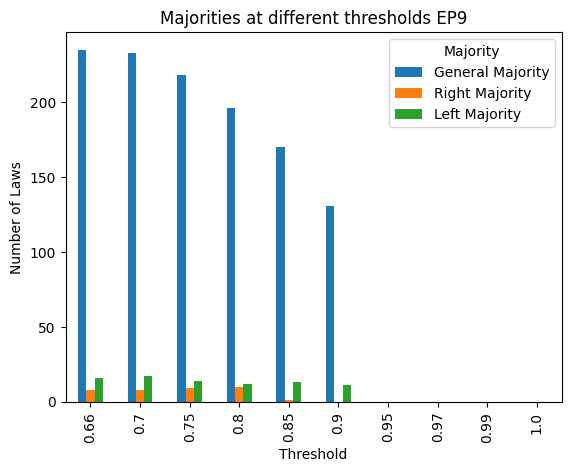

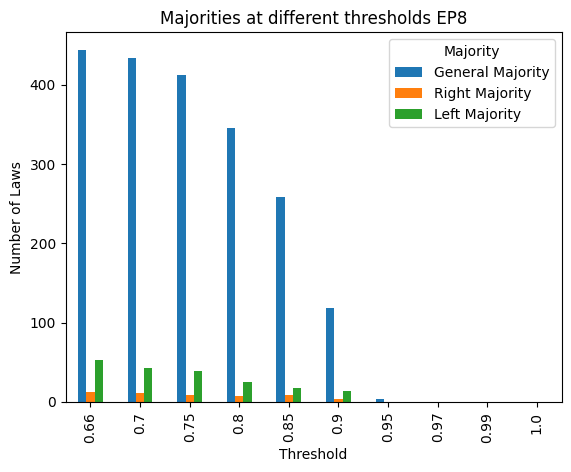

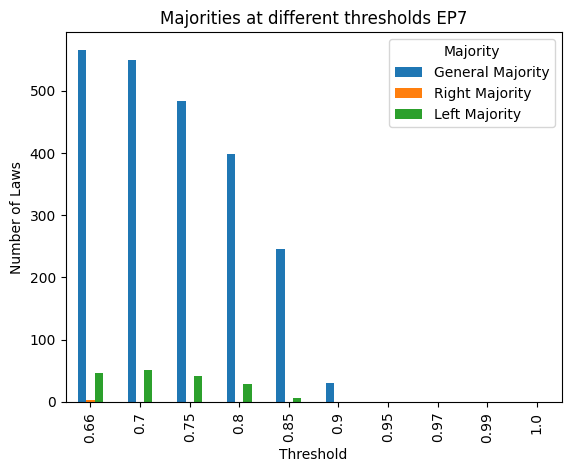

In [28]:
# plot the thresholds
# create a figure and a set of subplots
# plot the thresholds for EP9
tested_thresholds_EP9[["General Majority", "Right Majority", "Left Majority"]].plot(kind='bar', stacked=False)
plt.title('Majorities at different thresholds EP9')
plt.ylabel('Number of Laws')
plt.xlabel('Threshold')
plt.legend(title='Majority')
plt.show()

# plot the thresholds for EP8
tested_thresholds_EP8[["General Majority", "Right Majority", "Left Majority"]].plot(kind='bar', stacked=False)
plt.title('Majorities at different thresholds EP8')
plt.ylabel('Number of Laws')
plt.xlabel('Threshold')
plt.legend(title='Majority')
plt.show()

# plot the thresholds for EP7
tested_thresholds_EP7[["General Majority", "Right Majority", "Left Majority"]].plot(kind='bar', stacked=False)
plt.title('Majorities at different thresholds EP7')
plt.ylabel('Number of Laws')
plt.xlabel('Threshold')
plt.legend(title='Majority')
plt.show()

In [29]:
# Add consensus classes to the dataframes
# EP9
voted_majorities_EP9 = fu.get_majorities(voted_laws_groups_EP9, 0.66)
voted_laws_consensus_EP9 = pd.concat([voted_laws_groups_EP9, voted_majorities_EP9], axis=1)
# add column "Consensus" if column "No" (Votes Against) is 0
voted_laws_consensus_EP9['Consensus'] = voted_laws_consensus_EP9['No'].apply(lambda x: 1 if x == 0 else 0)
display(voted_laws_consensus_EP9.head(10))
# EP8
voted_majorities_EP8 = fu.get_majorities(voted_laws_groups_EP8, 0.66)
voted_laws_consensus_EP8 = pd.concat([voted_laws_groups_EP8, voted_majorities_EP8], axis=1)
voted_laws_consensus_EP8['Consensus'] = voted_laws_consensus_EP8['No'].apply(lambda x: 1 if x == 0 else 0)
# EP7
voted_majorities_EP7 = fu.get_majorities(voted_laws_groups_EP7, 0.66)
voted_laws_consensus_EP7 = pd.concat([voted_laws_groups_EP7, voted_majorities_EP7], axis=1)
voted_laws_consensus_EP7['Consensus'] = voted_laws_consensus_EP7['No'].apply(lambda x: 1 if x == 0 else 0)

,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,EPP%,Greens/EFA%,NI%,REG%,S&D%,The Left%,General Majority,Right Majority,Left Majority,Consensus
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,0.764,0.784,0.421,0.713,0.773,0.707,1,0,1,0
83,84,10,1,22.10.2019,Fishing authorisations for Union fishing vesse...,***I,Leg,Draft legislative resolution,s,Davies,...,0.791,0.824,0.526,0.787,0.805,0.732,1,0,0,0
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,0.808,0.865,0.439,0.833,0.818,0.780,1,0,0,0
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,0.808,0.892,0.895,0.852,0.851,0.756,1,0,0,1
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,0.813,0.851,0.316,0.778,0.766,0.854,1,0,0,0
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,0.808,0.068,0.404,0.944,0.766,0.000,1,0,0,0
366,367,18,1,28.11.2019,EU/USA Agreement on the allocation of a share ...,***,Leg,Draft legislative resolution,s,Lange,...,0.769,0.068,0.351,0.954,0.844,0.000,1,0,0,0
457,458,19,1,17.12.2019,Macro-financial assistance to Jordan,***I,Leg,Draft legislative resolution,s,Regimenti,...,0.885,1.000,0.421,1.009,0.935,0.610,1,0,0,0
458,459,19,1,17.12.2019,EU-Switzerland Agreement on the stepping up of...,***,Leg,Draft legislative resolution,s,Metsola,...,0.868,0.986,0.456,0.981,0.929,0.049,1,0,0,0
459,460,19,1,17.12.2019,EU-Liechtenstein Agreement on the stepping up ...,***,Leg,Draft legislative resolution,s,Metsola,...,0.885,1.000,0.456,1.009,0.935,0.049,1,0,0,0


In [30]:
# Before saving to csv, put quotation marks around all strings in the dataframe

# function to add quotes to all strings in a dataframe
def add_quotes(x):
    if isinstance(x, str):
        return f'"{x}"'
    else:
        return x

voted_laws_consensus_EP9 = voted_laws_consensus_EP9.map(add_quotes)
voted_laws_consensus_EP8 = voted_laws_consensus_EP8.map(add_quotes)
voted_laws_consensus_EP7 = voted_laws_consensus_EP7.map(add_quotes)



In [31]:
# save to csv
voted_laws_consensus_EP9.to_csv('data/processed_data/voted_laws_consensus_EP9.csv', index=False)
voted_laws_consensus_EP8.to_csv('data/processed_data/voted_laws_consensus_EP8.csv', index=False)
voted_laws_consensus_EP7.to_csv('data/processed_data/voted_laws_consensus_EP7.csv', index=False)

,Consensus,Right Majority,Left Majority,General Majority
2009-2014,4,3,47,566
2014-2019,0,12,53,444
2019-2022,4,8,16,235


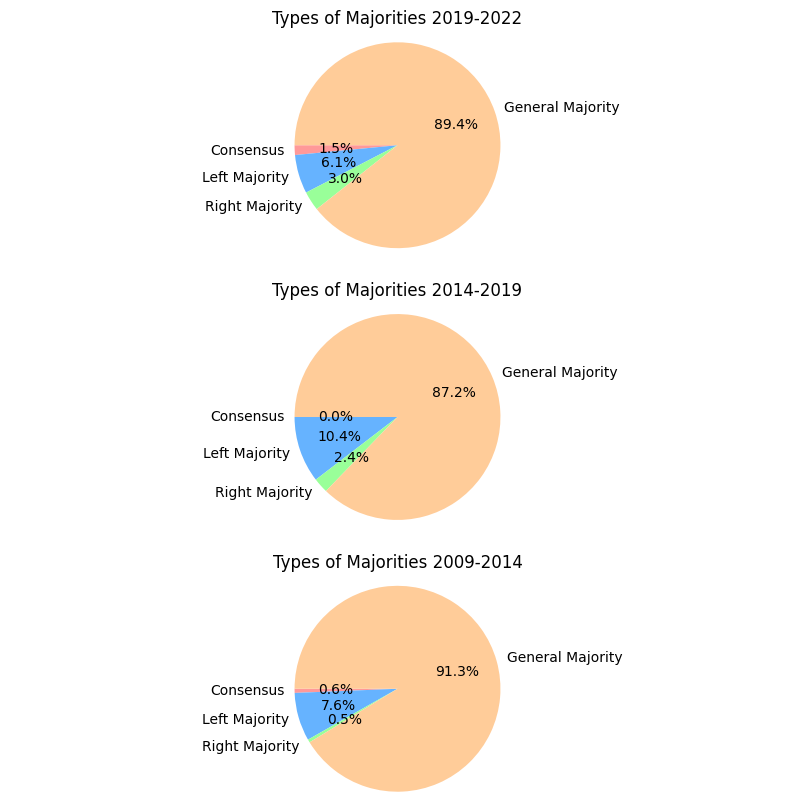

In [32]:
# Create dataframe with number of laws with consensus, right majority, left majority and general majority per year
consensus_EP9 = voted_laws_consensus_EP9['Consensus'].sum()
right_majority_EP9 = voted_laws_consensus_EP9['Right Majority'].sum()
left_majority_EP9 = voted_laws_consensus_EP9['Left Majority'].sum()
general_majority_EP9 = voted_laws_consensus_EP9['General Majority'].sum()

consensus_EP8 = voted_laws_consensus_EP8['Consensus'].sum()
right_majority_EP8 = voted_laws_consensus_EP8['Right Majority'].sum()
left_majority_EP8 = voted_laws_consensus_EP8['Left Majority'].sum()
general_majority_EP8 = voted_laws_consensus_EP8['General Majority'].sum()

consensus_EP7 = voted_laws_consensus_EP7['Consensus'].sum()
right_majority_EP7 = voted_laws_consensus_EP7['Right Majority'].sum()
left_majority_EP7 = voted_laws_consensus_EP7['Left Majority'].sum()
general_majority_EP7 = voted_laws_consensus_EP7['General Majority'].sum()

consensus = [consensus_EP7, consensus_EP8, consensus_EP9]
right_majority = [right_majority_EP7, right_majority_EP8, right_majority_EP9]
left_majority = [left_majority_EP7, left_majority_EP8, left_majority_EP9]
general_majority = [general_majority_EP7, general_majority_EP8, general_majority_EP9]

# combine to dataframe
majorities = pd.DataFrame({'Consensus': consensus, 'Right Majority': right_majority, 'Left Majority': left_majority, 'General Majority': general_majority})
majorities.index = ['2009-2014', '2014-2019', '2019-2022']
display(majorities)

# Plot a pie chart of the different types of majorities
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
labels = ['Consensus', 'Left Majority', 'Right Majority', 'General Majority']
sizes = [consensus_EP9, left_majority_EP9, right_majority_EP9, general_majority_EP9]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
axs[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
axs[0].set_title('Types of Majorities 2019-2022')
axs[0].axis('equal')
labels = ['Consensus', 'Left Majority', 'Right Majority', 'General Majority']
sizes = [consensus_EP8, left_majority_EP8, right_majority_EP8, general_majority_EP8]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
axs[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
axs[1].set_title('Types of Majorities 2014-2019')
axs[1].axis('equal')
labels = ['Consensus', 'Left Majority', 'Right Majority', 'General Majority']
sizes = [consensus_EP7, left_majority_EP7, right_majority_EP7, general_majority_EP7]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
axs[2].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
axs[2].set_title('Types of Majorities 2009-2014')
axs[2].axis('equal')
plt.show()

If the major parties voted in favour, in how many cases did the further right- or left-leaning parties vote with them?

In [33]:
vote_alingment = fu.get_vote_alingment(voted_laws_consensus_EP9, 
                                    ['The Left', "Greens/EFA", "S&D", "REG", "EPP", "ECR", "EFD/IDG", "NI"], 
                                    ['Left Majority', "Right Majority", "General Majority"]
                                    )
# rename columns
vote_alingment.columns = ['Left Majority', 'Left Majority%', 'Right Majority', 'Right Majority%', 'General Majority', 'General Majority%']

display(vote_alingment)

,Left Majority,Left Majority%,Right Majority,Right Majority%,General Majority,General Majority%
Voted with,,,,,,
The Left,16,100.00%,7,87.50%,225,95.74%
Greens/EFA,16,100.00%,6,75.00%,227,96.60%
S&D,16,100.00%,8,100.00%,235,100.00%
REG,16,100.00%,8,100.00%,235,100.00%
EPP,16,100.00%,8,100.00%,235,100.00%
ECR,14,87.50%,8,100.00%,234,99.57%
EFD/IDG,12,75.00%,8,100.00%,222,94.47%
NI,16,100.00%,8,100.00%,235,100.00%


Scrape texts

In [34]:
# extract report links
voted_laws_final_EP9 = fu.construct_report_links(voted_laws_consensus_EP9)
voted_laws_final_EP8 = fu.construct_report_links(voted_laws_consensus_EP8)
voted_laws_final_EP7 = fu.construct_report_links(voted_laws_consensus_EP7)
display(voted_laws_final_EP9.head(10))
print(voted_laws_final_EP9.shape)

,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,Greens/EFA%,NI%,REG%,S&D%,The Left%,General Majority,Right Majority,Left Majority,Consensus,Report link
82,83,10,1,"""22.10.2019""","""European Globalisation Adjustment Fund (2014-...","""***I""","""Leg""","""Draft legislative resolution""","""s""","""Blinkevičiūtė""",...,0.784,0.421,0.713,0.773,0.707,1,0,1,0,https://oeil.secure.europarl.europa.eu/oeil/po...
83,84,10,1,"""22.10.2019""","""Fishing authorisations for Union fishing vess...","""***I""","""Leg""","""Draft legislative resolution""","""s""","""Davies""",...,0.824,0.526,0.787,0.805,0.732,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
84,85,10,1,"""22.10.2019""","""Implementation and financing of the EU genera...","""***""","""Leg""","""Draft legislative resolution""","""s""","""Van Overtveldt""",...,0.865,0.439,0.833,0.818,0.780,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
85,86,10,1,"""22.10.2019""","""Periods of application of Regulation (EU) 201...","""***I""","""Leg""","""Draft legislative resolution""","""s""","""Delli""",...,0.892,0.895,0.852,0.851,0.756,1,0,0,1,https://oeil.secure.europarl.europa.eu/oeil/po...
149,150,12,1,"""24.10.2019""","""Financial assistance to Member States to cove...","""***I""","""Leg""","""Draft legislative resolution""","""s""","""Omarjee""",...,0.851,0.316,0.778,0.766,0.854,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
293,294,16,1,"""26.11.2019""","""EU-Ukraine Agreement Amending the trade prefe...","""***""","""Leg""","""Draft legislative resolution""","""s""","""GYŐRI""",...,0.068,0.404,0.944,0.766,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
366,367,18,1,"""28.11.2019""","""EU/USA Agreement on the allocation of a share...","""***""","""Leg""","""Draft legislative resolution""","""s""","""Lange""",...,0.068,0.351,0.954,0.844,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
457,458,19,1,"""17.12.2019""","""Macro-financial assistance to Jordan""","""***I""","""Leg""","""Draft legislative resolution""","""s""","""Regimenti """,...,1.000,0.421,1.009,0.935,0.610,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
458,459,19,1,"""17.12.2019""","""EU-Switzerland Agreement on the stepping up o...","""***""","""Leg""","""Draft legislative resolution""","""s""","""Metsola""",...,0.986,0.456,0.981,0.929,0.049,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
459,460,19,1,"""17.12.2019""","""EU-Liechtenstein Agreement on the stepping up...","""***""","""Leg""","""Draft legislative resolution""","""s""","""Metsola""",...,1.000,0.456,1.009,0.935,0.049,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...


(257, 45)


In [35]:
# extract summary links
# take each link from column "Report link", parse html, find "button" with id "summary"
summary_links_EP9 = fu.extract_summary_links(voted_laws_final_EP9['Report link'])
summary_links_EP8 = fu.extract_summary_links(voted_laws_final_EP8['Report link'])
summary_links_EP7 = fu.extract_summary_links(voted_laws_final_EP7['Report link'])

Failed to retrieve or parse https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference="2019/0179(COD"): HTTPSConnectionPool(host='oeil.secure.europarl.europa.eu', port=443): Max retries exceeded with url: /oeil/popups/ficheprocedure.do?lang=en&reference=%222019/0179(COD%22) (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001A5107C4890>, 'Connection to oeil.secure.europarl.europa.eu timed out. (connect timeout=None)'))
Failed to retrieve or parse https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference="2021/0211(COD"): 404 Client Error: Not Found for url: https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=%222021/0211(COD%22)
Failed to retrieve or parse https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference="2021/0211(COD"): 404 Client Error: Not Found for url: https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.d

In [36]:
# print first ten summary links
print(summary_links_EP9[:10])
print(summary_links_EP8[:10])
print(summary_links_EP7[:10])
# print number of NAs in summary links
print(summary_links_EP9.count("NA"))
print(summary_links_EP8.count("NA"))
print(summary_links_EP7.count("NA"))

['https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1589986&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1589989&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1594772&t=e&l=en', 'NA', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1589992&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1589357&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1589750&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1590181&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1585141&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1585147&t=e&l=en']
['https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1352009&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1352009&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summa

In [37]:
# add summary links to voted_docs_final
voted_laws_final_EP9['Summary link'] = summary_links_EP9
voted_laws_final_EP8['Summary link'] = summary_links_EP8
voted_laws_final_EP7['Summary link'] = summary_links_EP7
voted_laws_final_EP8.head(10)

,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,NI%,REG%,S&D%,The Left%,General Majority,Right Majority,Left Majority,Consensus,Report link,Summary link
39,40,3.0,1.0,2014-09-16 00:00:00,"""EU-Ukraine association agreement, with the ex...","""***""","""Leg""","""Draft legislative resolution""","""s""","""Saryusz-Wolski """,...,0.058,0.910,0.916,0.019,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
40,41,3.0,1.0,2014-09-16 00:00:00,"""EU-Ukraine association agreement, as regards ...","""***""","""Leg""","""Draft legislative resolution""","""s""","""Moraes """,...,0.077,0.910,0.916,0.019,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
131,132,7.0,1.0,"""22.10.2014""","""Protocol to the EU-Republic of Korea Free Tra...","""***""","""Leg""","""Draft legislative resolution""","""s""","""Zahradil""",...,0.058,0.836,0.911,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
137,138,8.0,1.0,"""23.10.2014""","""Customs duties on goods originating in Ukraine""","""***I""","""Leg""","""Draft legislative resolution""","""s""","""Landsbergis""",...,0.058,0.761,0.864,0.019,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
142,143,9.0,1.0,"""13.11.2014""","""Association agreement between the European Un...","""***""","""Leg""","""Draft legislative resolution""","""s""","""Auštrevičius""",...,0.096,0.955,0.864,0.019,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
154,155,10.0,1.0,"""25.11.2014""","""Protocol on matters specific to railway rolli...","""***""","""Leg""","""Draft legislative resolution""","""s""","""Hautala""",...,0.115,0.896,0.853,0.019,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
155,156,10.0,1.0,"""25.11.2014""","""Hague Convention of 30 June 2005 on choice of...","""***""","""Leg""","""Draft legislative resolution""","""s""","""Svoboda""",...,0.135,0.910,0.885,0.750,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
217,218,13.0,1.0,"""16.12.2014""","""Scientific examination of questions relating ...","""***I""","""Leg""","""Draft legislative resolution""","""s""","""La Via""",...,0.173,0.970,0.932,0.904,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
218,219,13.0,1.0,"""16.12.2014""","""Convention on International Trade in Endanger...","""***""","""Leg""","""Draft legislative resolution""","""s""","""Ayuso""",...,0.212,0.970,0.932,0.923,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
219,220,13.0,1.0,"""16.12.2014""","""Cooperation agreement on a civil Global Navig...","""***""","""Leg""","""Draft legislative resolution""","""s""","""Buzek""",...,0.173,0.970,0.921,0.096,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...


In [38]:
# extract summary texts
summary_texts_EP9 = fu.extract_summary_texts(voted_laws_final_EP9['Summary link'])
summary_texts_EP8 = fu.extract_summary_texts(voted_laws_final_EP8['Summary link'])
summary_texts_EP7 = fu.extract_summary_texts(voted_laws_final_EP7['Summary link'])

Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1619211&t=e&l=en: ('Connection aborted.', ConnectionResetError(10054, 'Eine vorhandene Verbindung wurde vom Remotehost geschlossen', None, 10054, None))
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Summaries extracted: 257
Total summaries successfully extracted 249 out of 257
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perha

In [39]:
# append texts to voted_docs_final as new column
voted_laws_final_EP9['Summary text'] = summary_texts_EP9
voted_laws_final_EP8['Summary text'] = summary_texts_EP8
voted_laws_final_EP7['Summary text'] = summary_texts_EP7
voted_laws_final_EP9.head(10)

,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,REG%,S&D%,The Left%,General Majority,Right Majority,Left Majority,Consensus,Report link,Summary link,Summary text
82,83,10,1,"""22.10.2019""","""European Globalisation Adjustment Fund (2014-...","""***I""","""Leg""","""Draft legislative resolution""","""s""","""Blinkevičiūtė""",...,0.713,0.773,0.707,1,0,1,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to enable the European Globalisation ...
83,84,10,1,"""22.10.2019""","""Fishing authorisations for Union fishing vess...","""***I""","""Leg""","""Draft legislative resolution""","""s""","""Davies""",...,0.787,0.805,0.732,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to amend certain provisions relating ...
84,85,10,1,"""22.10.2019""","""Implementation and financing of the EU genera...","""***""","""Leg""","""Draft legislative resolution""","""s""","""Van Overtveldt""",...,0.833,0.818,0.780,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to mitigate the negative effects of t...
85,86,10,1,"""22.10.2019""","""Periods of application of Regulation (EU) 201...","""***I""","""Leg""","""Draft legislative resolution""","""s""","""Delli""",...,0.852,0.851,0.756,1,0,0,1,https://oeil.secure.europarl.europa.eu/oeil/po...,NA,NA
149,150,12,1,"""24.10.2019""","""Financial assistance to Member States to cove...","""***I""","""Leg""","""Draft legislative resolution""","""s""","""Omarjee""",...,0.778,0.766,0.854,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to extend the scope of the European U...
293,294,16,1,"""26.11.2019""","""EU-Ukraine Agreement Amending the trade prefe...","""***""","""Leg""","""Draft legislative resolution""","""s""","""GYŐRI""",...,0.944,0.766,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,"PURPOSE: to conclude, on behalf of the Union, ..."
366,367,18,1,"""28.11.2019""","""EU/USA Agreement on the allocation of a share...","""***""","""Leg""","""Draft legislative resolution""","""s""","""Lange""",...,0.954,0.844,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to review the functioning of an exist...
457,458,19,1,"""17.12.2019""","""Macro-financial assistance to Jordan""","""***I""","""Leg""","""Draft legislative resolution""","""s""","""Regimenti """,...,1.009,0.935,0.610,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to provide further macro-financial as...
458,459,19,1,"""17.12.2019""","""EU-Switzerland Agreement on the stepping up o...","""***""","""Leg""","""Draft legislative resolution""","""s""","""Metsola""",...,0.981,0.929,0.049,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to conclude an agreement between the ...
459,460,19,1,"""17.12.2019""","""EU-Liechtenstein Agreement on the stepping up...","""***""","""Leg""","""Draft legislative resolution""","""s""","""Metsola""",...,1.009,0.935,0.049,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to conclude an agreement between the ...


In [40]:
# print number of NAs in Summary text
print((voted_laws_final_EP9['Summary text']=="NA").sum())
print((voted_laws_final_EP8['Summary text']=="NA").sum())
print((voted_laws_final_EP7['Summary text']=="NA").sum())

# print sum of all non-NA Summary texts
summaries_EP9 = (voted_laws_final_EP9['Summary text']!="NA").sum()
summaries_EP8 = (voted_laws_final_EP8['Summary text']!="NA").sum()
summaries_EP7 = (voted_laws_final_EP7['Summary text']!="NA").sum()
print(f"Total number of summaries extracted: {summaries_EP9 + summaries_EP8 + summaries_EP7} out of {voted_laws_final_EP9.shape[
    0] + voted_laws_final_EP8.shape[0] + voted_laws_final_EP7.shape[0]}")


8
27
104
Total number of summaries extracted: 1254 out of 1393


In [41]:
# save voted_laws_final
voted_laws_final_EP9.to_csv('data/processed_data/voted_laws_final_EP9.csv')
voted_laws_final_EP8.to_csv('data/processed_data/voted_laws_final_EP8.csv')
voted_laws_final_EP7.to_csv('data/processed_data/voted_laws_final_EP7.csv')

Get migration laws and rejected amendments

In [42]:
# rename column Yeas to Yes
rejected_amendments_EP9_not_com = rejected_amendments_EP9_not_com.rename(columns={"Yeas": "Yes"})
rejected_amendments_EP8_not_com = rejected_amendments_EP8_not_com.rename(columns={"Yeas": "Yes"})
rejected_amendments_EP7_not_com = rejected_amendments_EP7_not_com.rename(columns={"Yeas": "Yes"})

# concatenate dataframes
rejected_amendments = pd.concat([rejected_amendments_EP9_not_com, rejected_amendments_EP8_not_com, rejected_amendments_EP7_not_com], ignore_index=True)

# delete last 10 columns
rejected_amendments = rejected_amendments.iloc[:, :-16]
display(rejected_amendments.head(10))

# save to csv
rejected_amendments.to_csv('data/processed_data/rejected_amendments.csv', index=False)


#How many amendments or laws include word "migration" in column Summary
voted_laws_final_EP9['Summary text'] = voted_laws_final_EP9['Summary text'].str.lower()
voted_laws_final_EP8['Summary text'] = voted_laws_final_EP8['Summary text'].str.lower()
voted_laws_final_EP7['Summary text'] = voted_laws_final_EP7['Summary text'].str.lower()

# dataframe with only rows with migration in Summary text
voted_laws_migration_EP9 = voted_laws_final_EP9[voted_laws_final_EP9['Summary text'].str.contains('migration', na=False)]
voted_laws_migration_EP8 = voted_laws_final_EP8[voted_laws_final_EP8['Summary text'].str.contains('migration', na=False)]
voted_laws_migration_EP7 = voted_laws_final_EP7[voted_laws_final_EP7['Summary text'].str.contains('migration', na=False)]

# rename column Yeas to Yes
voted_laws_migration_EP9 = voted_laws_migration_EP9.rename(columns={"Yeas": "Yes"})
voted_laws_migration_EP8 = voted_laws_migration_EP8.rename(columns={"Yeas": "Yes"})
voted_laws_migration_EP7 = voted_laws_migration_EP7.rename(columns={"Yeas": "Yes"})

# concatenate dataframes
voted_laws_migration = pd.concat([voted_laws_migration_EP9, voted_laws_migration_EP8, voted_laws_migration_EP7], ignore_index=True)

# delete unnecessary columns
voted_laws_migration = voted_laws_migration.drop(columns=['De', 'De/Policy area', 'Final \nvote?'])

display(voted_laws_migration.head(10))
print(voted_laws_migration.shape)

,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,Policy area,Subject,Final vote?,Am No.,Author,RCV,Vote,Yes,No,Abs
0,848,32.0,2.0,17.04.2020,Specific measures to provide exceptional flexi...,***I,Leg,Draft legislative resolution,s,Omarjee,...,Regional development,"Article 1, point 1\nRegulation (EU) No 1303/20...",0.0,1,EUL/NGL,RCV,-,38,613,40
1,849,32.0,3.0,17.04.2020,Specific measures to provide exceptional flexi...,***I,Leg,Draft legislative resolution,s,Omarjee,...,Regional development,"Article 2, after point 1\nRegulation (EU) No 1...",0.0,2,EUL/NGL,RCV,-,47,604,40
2,850,32.0,4.0,17.04.2020,Specific measures to provide exceptional flexi...,***I,Leg,Draft legislative resolution,s,Omarjee,...,Regional development,"Article 2, after point 1\nRegulation (EU) No 1...",0.0,3,EUL/NGL,RCV,-,47,601,43
3,853,32.0,2.0,17.04.2020,Introduction of specific measures for addressi...,***I,Leg,Draft legislative resolution,s,0,...,Employment & Social Affairs,"Article 1, before point 1\nRegulation (EU) No ...",0.0,3,EUL/NGL,RCV,-,20,660,10
4,855,32.0,4.0,17.04.2020,Introduction of specific measures for addressi...,***I,Leg,Draft legislative resolution,s,0,...,Employment & Social Affairs,"Article 1, after point 6\nRegulation (EU) No 2...",0.0,4,EUL/NGL,RCV,-,43,634,12
5,859,32.0,2.0,17.04.2020,Specific measures to mitigate the impact of th...,***I,Leg,Draft legislative resolution,s,Karleskind,...,Fisheries,"Article 1, point 1 Regulation (EU) No 508/2014...",0.0,1,EUL/NGL,RCV,-,22,641,26
6,861,32.0,4.0,17.04.2020,Specific measures to mitigate the impact of th...,***I,Leg,Draft legislative resolution,s,Karleskind,...,Fisheries,"Article 1, after point 5\nRegulation (EU) No 5...",0.0,2,EUL/NGL,RCV,-,79,585,27
7,864,32.0,7.0,17.04.2020,Specific measures to mitigate the impact of th...,***I,Leg,Draft legislative resolution,s,Karleskind,...,Fisheries,"Article 1, after point 10\nRegulation (EU) No ...",0.0,3,EUL/NGL,RCV,-,77,589,24
8,868,32.0,11.0,17.04.2020,Specific measures to mitigate the impact of th...,***I,Leg,Draft legislative resolution,s,Karleskind,...,Fisheries,"Article 1, after point 12\nRegulation (EU) No ...",0.0,4,EUL/NGL,RCV,-,75,590,26
9,992,35.0,2.0,15.05.2020,Macro-financial assistance to enlargement and ...,***I,Leg,Draft legislative resolution,s,0,...,International trade,"Article 1, paragraph 2",0.0,1,EUL/NGL,RCV,-,61,606,27


,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,REG%,S&D%,The Left%,General Majority,Right Majority,Left Majority,Consensus,Report link,Summary link,Summary text
0,836,31.0,1.0,"""16.04.2020""","""Request for urgent procedure - Regulation Ame...","""***""","""Leg""","""Proposal for a decision""","""s""","""Olbrycht/Marques""",...,0.935,0.916,0.927,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,"purpose: to amend regulation (eu, euratom) no ..."
1,882,31.0,1.0,"""16.04.2020""","""Regulation Amendmentending the Multiannual fi...","""***I""","""Leg""","""Draft legislative resolution""","""s""","""Olbrycht/Marques""",...,0.741,0.617,0.659,0,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,"purpose: to amend regulation (eu, euratom) no ..."
2,2836,47.0,1.0,"""05.10.2020""","""European Parliament delegation to the Concili...","""***I""","""Leg""","""Draft legislative resolution""","""s""","""Brudziński""",...,0.944,0.909,0.902,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,purpose: to enable a maximum use of funds to a...
3,8736,89.0,2.0,"""08.06.2021""","""ETIAS consequential amendments: ECRIS-TCN""","""***I""","""Leg""","""Draft legislative resolution""","""s""","""Lenaers""",...,0.917,0.058,0.000,0,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,"the committee on civil liberties, justice and ..."
4,9885,98.0,1.0,"""15.09.2021""","""Visa Facilitation Agreement between the EU an...","""***""","""Leg""","""Draft legislative resolution""","""s""","""López Aguilar""",...,0.935,0.903,0.244,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,purpose: to conclude the agreement between the...
5,12409,125.0,1.0,"""24.03.2022""","""Refugees in Europe: CARE""","""***I""","""Leg""","""Draft legislative resolution""","""s""",0,...,0.796,0.753,0.854,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,purpose: facilitate the use of resources from ...
6,12415,125.0,6.0,"""24.03.2022""","""More flexible use of funds under the AMIF Reg...","""***I""","""Leg""","""Draft legislative resolution""","""s""",0,...,0.815,0.766,0.805,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,purpose: optimise the use of the home affairs ...
7,12524,127.0,1.0,"""07.04.2022""","""Increased pre-financing from REACT-EU""","""***I""","""Leg""","""Draft legislative resolution""","""s""",0,...,0.824,0.734,0.732,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,purpose: to provide for an increased amount of...
8,545,24.0,1.0,"""15.04.2015""","""Amendment of the MFF 2014-2020""","""***""","""Leg""","""Draft legislative resolution""","""q""","""Olbrycht/I.Thomas""",...,0.806,0.901,0.731,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,"purpose: to amend regulation (eu, euratom) no ..."
9,1606,45.0,1.0,"""6.10.2015""","""ILO Forced Labour Convention: judicial cooper...","""***""","""Leg""","""Draft legislative resolution""","""s""","""Stevens""",...,0.940,0.932,0.923,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,"purpose: to authorise member states to ratify,..."


(64, 47)


In [44]:
# save to csv
voted_laws_migration.to_csv('data/processed_data/voted_laws_migration.csv', index=False)
